# Skin Cancer Image Classification

In [1]:
# Import Relevant Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings('ignore')

In [1]:
!ls ../data/ISIC_IMAGES_512x512/

ADD_ISIC
ISIC2019
ISIC2020


## 1. Data Understanding

Our data comes from The International Skin Imaging Collaboration (ISIC) archive:

- **DATASET-1:**
    - Originated from https://challenge2020.isic-archive.com/, I will use resized images from: https://www.kaggle.com/cdeotte/jpeg-melanoma-512x512?select=train.csv
    
    
- **DATASET-2:**
    - Originated from: https://challenge2019.isic-archive.com/, I will use resized images from: https://www.kaggle.com/cdeotte/jpeg-isic2019-512x512

    
    
- **DATASET-3:**
    - Originated from ISIC Archive: https://www.isic-archive.com/#!/topWithHeader/onlyHeaderTop/gallery?filter=%5B%5D, I will use resized images from: https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/169139

    - JPEG folder of the 580 new never seen before malignant images
    
    
    
- All images in the final dataset contain 512 x 512 image size.  

In [2]:
# define datasets
df2020 = pd.read_csv('../data/ISIC_IMAGES_512x512/ISIC2020/train2020.csv')
df2019 = pd.read_csv('../data/ISIC_IMAGES_512x512/ISIC2019/train2019.csv')
dfAdd = pd.read_csv('../data/ISIC_IMAGES_512x512/Add_ISIC/train_add.csv')

In [4]:
# define the file path
data2020_dir = '../data/ISIC_IMAGES_512x512/ISIC2020/image2020/'
data2019_dir = '../data/ISIC_IMAGES_512x512/ISIC2019/image2019/'
dataAdd_dir = '../data/ISIC_IMAGES_512x512/Add_ISIC/image_add/'

### ISIC - 2020 DATASET

In [5]:
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000
...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053


In [6]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.8+ MB


In [7]:
df2020['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [8]:
df2020['target'].value_counts(normalize=True)

0    0.98237
1    0.01763
Name: target, dtype: float64

- We have a very big class difference between bening and malignant images. 

In [9]:
# add image's path data to train and test set
df2020['path'] = data2020_dir + df2020['image_name'] + ".jpg"

In [10]:
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...


In [11]:
df2020_benign = df2020[df2020['benign_malignant'] == 'benign']
df2020_benign

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,2,2592,1936,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,11,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,3,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,11,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...


In [12]:
df2020_malignant = df2020[df2020['benign_malignant'] == 'malignant']
df2020_malignant

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1,5,3264,2448,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1,3,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1,9,4288,2848,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1,10,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
...,...,...,...,...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1,5,640,480,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1,13,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1,-1,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1,6,4288,2848,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...


In [13]:
# Downsample benign images to 6750
df2020_benign_sample = df2020_benign[:6750]

In [14]:
df2020_benign_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 0 to 6859
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     6750 non-null   object 
 1   patient_id                     6750 non-null   object 
 2   sex                            6737 non-null   object 
 3   age_approx                     6734 non-null   float64
 4   anatom_site_general_challenge  6647 non-null   object 
 5   diagnosis                      6750 non-null   object 
 6   benign_malignant               6750 non-null   object 
 7   target                         6750 non-null   int64  
 8   tfrecord                       6750 non-null   int64  
 9   width                          6750 non-null   int64  
 10  height                         6750 non-null   int64  
 11  path                           6750 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage:

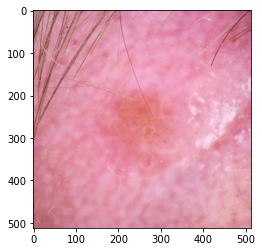

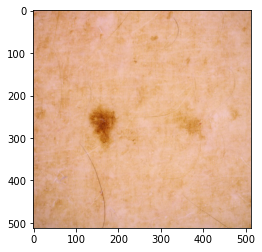

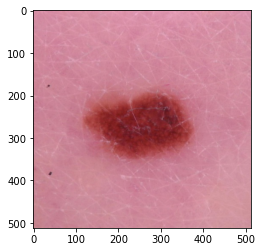

In [15]:
# look into 3 benign image samples from df2020:
for im in df2020_benign_sample['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

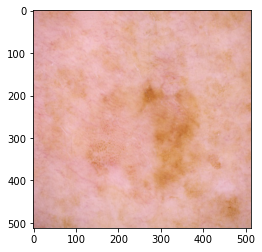

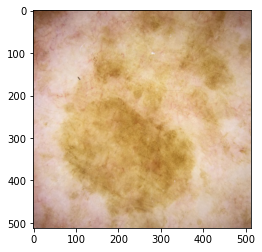

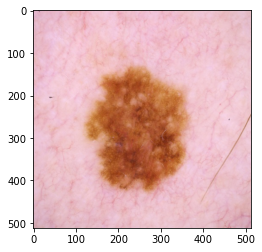

In [16]:
# look into 3 malignant image samples from df2020:
for im in df2020_malignant['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

### ISIC - 2019 DATASET

In [17]:
df2019

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024


In [18]:
df2019['target'].value_counts()

0    20809
1     4522
Name: target, dtype: int64

In [19]:
# add image's path data to train and test set
df2019['path'] = data2019_dir + df2019['image_name'] + ".jpg"

In [20]:
df2019_mal = df2019[df2019['benign_malignant'] == 'malignant']
df2019_mal

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
12,ISIC_0000013,-1,female,30.0,posterior torso,MEL,malignant,1,20,1022,767,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
21,ISIC_0000022_downsampled,-1,female,55.0,lower extremity,MEL,malignant,1,14,1024,768,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
25,ISIC_0000026_downsampled,-1,female,30.0,lower extremity,MEL,malignant,1,14,1024,768,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
...,...,...,...,...,...,...,...,...,...,...,...,...
25316,ISIC_0073231,-1,female,55.0,anterior torso,MEL,malignant,1,17,1024,1024,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
25319,ISIC_0073237,-1,female,45.0,lower extremity,MEL,malignant,1,11,1024,1024,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
25320,ISIC_0073238,-1,female,45.0,upper extremity,MEL,malignant,1,11,1024,1024,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...
25322,ISIC_0073241,-1,male,60.0,palms/soles,MEL,malignant,1,13,1024,1024,../data/ISIC_IMAGES_512x512/ISIC2019/image2019...


In [21]:
df2019_mal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 2 to 25328
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     4522 non-null   object 
 1   patient_id                     4522 non-null   int64  
 2   sex                            4522 non-null   object 
 3   age_approx                     4437 non-null   float64
 4   anatom_site_general_challenge  4395 non-null   object 
 5   diagnosis                      4522 non-null   object 
 6   benign_malignant               4522 non-null   object 
 7   target                         4522 non-null   int64  
 8   tfrecord                       4522 non-null   int64  
 9   width                          4522 non-null   int64  
 10  height                         4522 non-null   int64  
 11  path                           4522 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage

In [22]:
df2019_mal.isna().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                        85
anatom_site_general_challenge    127
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
path                               0
dtype: int64

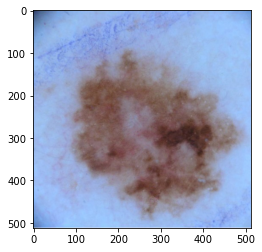

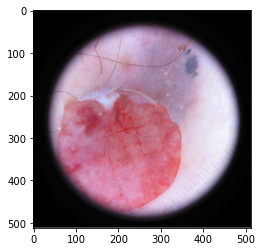

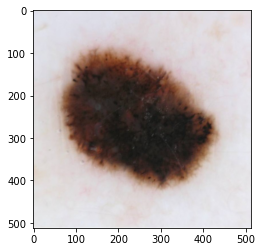

In [23]:
# look into 3 malignant image samples from df2019:
for im in df2019_mal['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

### ISIC ARCHIVE ADDITIONAL MALIGNANT DATASET

In [24]:
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29


In [25]:
dfAdd['target'].value_counts()

1    580
Name: target, dtype: int64

In [26]:
dfAdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     580 non-null    object 
 1   patient_id                     580 non-null    int64  
 2   sex                            547 non-null    object 
 3   age_approx                     557 non-null    float64
 4   anatom_site_general_challenge  471 non-null    object 
 5   diagnosis                      554 non-null    object 
 6   benign_malignant               580 non-null    object 
 7   target                         580 non-null    int64  
 8   width                          580 non-null    int64  
 9   height                         580 non-null    int64  
 10  source                         580 non-null    object 
 11  ext                            580 non-null    object 
 12  tfrecord                       580 non-null    int

In [27]:
dfAdd.isna().sum()

image_name                         0
patient_id                         0
sex                               33
age_approx                        23
anatom_site_general_challenge    109
diagnosis                         26
benign_malignant                   0
target                             0
width                              0
height                             0
source                             0
ext                                0
tfrecord                           0
dtype: int64

In [28]:
# add image's path data to train and test set
dfAdd['path'] = dataAdd_dir + dfAdd['image_name'] + ".jpg"

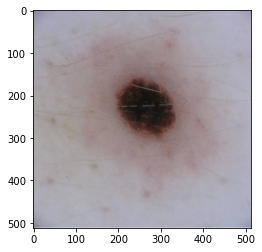

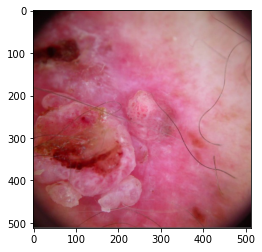

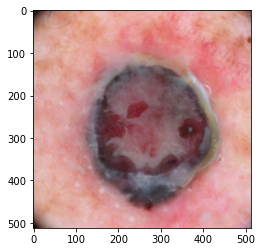

In [29]:
# look into 3 malignant image samples from additional dataset, dfAdd:
for im in dfAdd['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

### Final Dataset:

In the final dataset, we will use 6750 benign images from df2020, and all malignant images from df2020, df2019, and dfAdd datasets.

In [30]:
df_final = pd.concat([df2020_benign_sample, df2020_malignant, df2019_mal, dfAdd], axis=0, ignore_index= True)
df_final

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,path,source,ext
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,NaN,NaN
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,NaN,NaN
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,NaN,NaN
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,NaN,NaN
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12431,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,29,3008,2000,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,2018 JID Editorial Images,jpg
12432,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,29,3008,2000,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,2018 JID Editorial Images,jpg
12433,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,29,3008,2000,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,2018 JID Editorial Images,jpg
12434,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,29,4288,2848,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,2018 JID Editorial Images,jpg


In [31]:
df_final['target'].value_counts(normalize=True)

0    0.542779
1    0.457221
Name: target, dtype: float64

In [32]:
df_final['target'].value_counts()

0    6750
1    5686
Name: target, dtype: int64

In the final dataset, we got more balanced images for each class. We have 6750 images for benign class and 5686 images for malignant class.

In [33]:
# Save the final dataset
df_final.to_csv('../data/ISIC_FINAL_DATASET_512x512.csv', index=False)

## 2. Exploratory Data Analysis

In [34]:
# create a copy of df_final for EDA purposes:
df_copy = df_final[['image_name', 'path', 'sex', 'age_approx', 'anatom_site_general_challenge', 'benign_malignant']]
df_copy

,image_name,path,sex,age_approx,anatom_site_general_challenge,benign_malignant
0,ISIC_2637011,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,male,45.0,head/neck,benign
1,ISIC_0015719,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,female,45.0,upper extremity,benign
2,ISIC_0052212,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,female,50.0,lower extremity,benign
3,ISIC_0068279,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,female,45.0,head/neck,benign
4,ISIC_0074268,../data/ISIC_IMAGES_512x512/ISIC2020/image2020...,female,55.0,upper extremity,benign
...,...,...,...,...,...,...
12431,ISIC_0024302,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,female,25.0,NaN,malignant
12432,ISIC_0024303,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,male,60.0,NaN,malignant
12433,ISIC_0024304,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,male,70.0,NaN,malignant
12434,ISIC_0024305,../data/ISIC_IMAGES_512x512/Add_ISIC/image_add...,male,85.0,NaN,malignant


In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12436 entries, 0 to 12435
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     12436 non-null  object 
 1   path                           12436 non-null  object 
 2   sex                            12390 non-null  object 
 3   age_approx                     12312 non-null  float64
 4   anatom_site_general_challenge  12088 non-null  object 
 5   benign_malignant               12436 non-null  object 
dtypes: float64(1), object(5)
memory usage: 583.1+ KB


In [36]:
df_copy.isna().sum()

image_name                         0
path                               0
sex                               46
age_approx                       124
anatom_site_general_challenge    348
benign_malignant                   0
dtype: int64

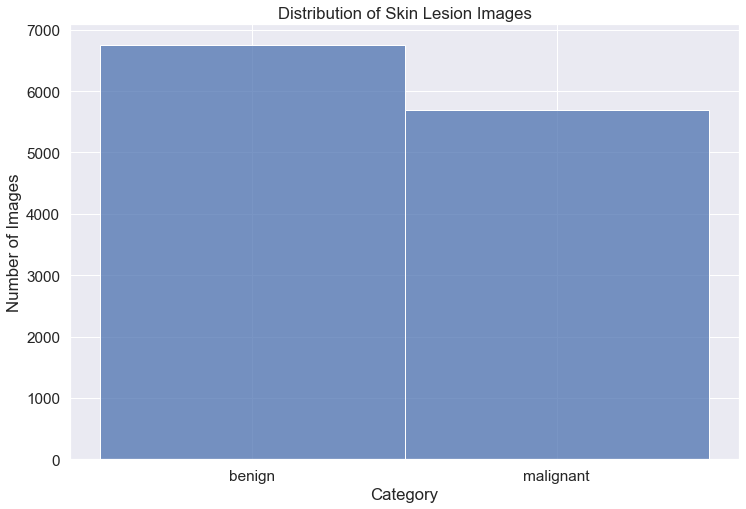

In [37]:
# Creating a histogram to visualize the class imbalance
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy, x="benign_malignant")
plt.ylabel("Number of Images")
plt.xlabel("Category")
plt.title('Distribution of Skin Lesion Images');

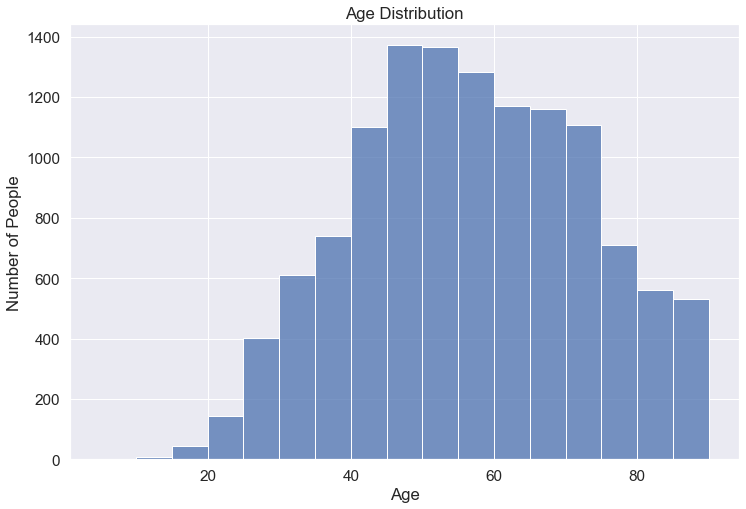

In [38]:
# Creating a histogram to visualize age distribution
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy, x="age_approx", binwidth=5)
plt.ylabel("Number of People")
plt.xlabel("Age")
plt.title('Age Distribution');

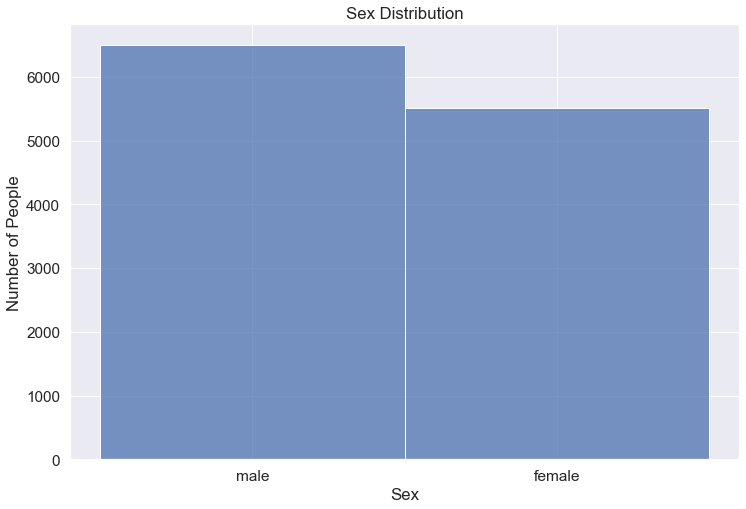

In [39]:
# Creating a histogram to visualize sex
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy.dropna(), x="sex")
plt.ylabel("Number of People")
plt.xlabel("Sex")
plt.title('Sex Distribution');

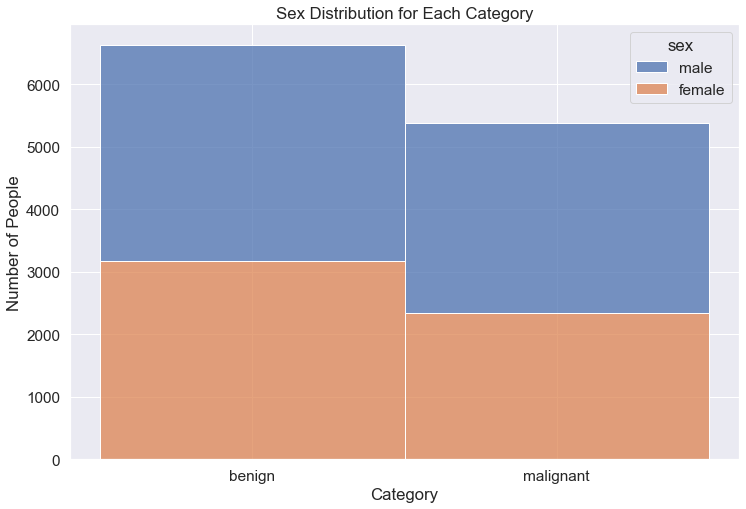

In [40]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy.dropna(), x="benign_malignant", hue="sex",  multiple="stack")
plt.ylabel("Number of People")
plt.xlabel("Category")
plt.title('Sex Distribution for Each Category');